<a href="https://colab.research.google.com/github/CharleneLimKH/python-mini-exercises/blob/main/Week_3_Assignment_3_Quantum_Circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install qiskit qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 15.0 MB/s eta 0:00:00


In [31]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeGuadalupeV2
from qiskit_aer.noise import NoiseModel

# Fetch backend and noise model
fake_device = FakeGuadalupeV2()
noise_model = NoiseModel.from_backend(fake_device)





In [32]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0]) #apply hadamard gate to create entanglement
circuit.cx(qreg_q[0], qreg_q[1]) #apply cNot gate on q[0] to create entanglement
circuit.cx(qreg_q[1], qreg_q[2])

In [33]:
%matplotlib inline

In [44]:
circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [45]:
circuit.measure(qreg_q, creg_c) #measure qubit in quantim register and store them in classical register

In [46]:
simulator = AerSimulator(noise_model=noise_model) #simulation of quantum circuit in classical computer

In [47]:
from qiskit.execute_function import execute
result = execute(circuit, backend = simulator).result()

In [48]:
from qiskit.tools.visualization import plot_histogram

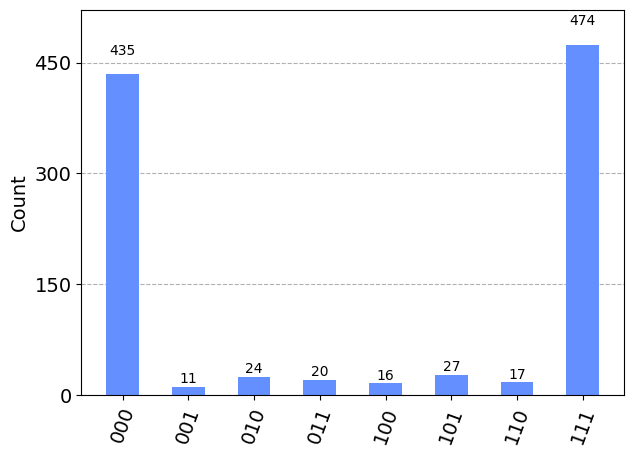

In [49]:
plot_histogram(result.get_counts(circuit))